<a href="https://colab.research.google.com/github/sagihaider/Biogas_Prediction/blob/master/MLP_MISO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sagihaider/Biogas_Prediction.git 

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dense
from sklearn.preprocessing import normalize
from keras import optimizers
from sklearn.model_selection import train_test_split

Cloning into 'Biogas_Prediction'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 333 (delta 6), reused 46 (delta 1), pack-reused 275
Receiving objects: 100% (333/333), 72.30 MiB | 32.64 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [2]:
data = pd.read_excel('/content/Biogas_Prediction/Data/Gasification Data_Daya.xlsx', index_col=0, header=0)
data = data.iloc[1:223,:14] 
display(list(data.columns.values))

['C [%wt db]',
 'H [%wt db]',
 'O [%wt db]',
 'Moisture [%wt]',
 'Ash [%wt db]',
 'ER [-]',
 'T [ºC]',
 'Bed material',
 'Steam/Biomass',
 'H2 [%vol N2 free]',
 'CO [%vol N2 free]',
 'CO2 [%vol N2 free]',
 'CH4 [%vol N2 free]',
 'GY [Nm3/kg daf]']

In [3]:
# Drop null balues and store dataframe in dataframe 2
data=data.dropna()
print(data)

#Check Null values again after removing
print(data.isnull().values.any())
print(data.isna().values.any())

X_all = data.iloc[:, :9]
y_all = data.iloc[:, 9:]

        C [%wt db] H [%wt db]  ...  CH4 [%vol N2 free] GY [Nm3/kg daf]
Sr No.                         ...                                    
2            50.00        5.7  ...            6.474820        2.500000
3            50.00        5.7  ...            7.164179        2.500000
4            50.00        5.7  ...            6.474820        2.100000
5            50.00        5.7  ...            6.474820        2.400000
6            50.00        5.7  ...            8.181818        2.100000
...            ...        ...  ...                 ...             ...
219          46.85        6.3  ...            9.706147        0.947532
220          46.85        6.3  ...            9.455065        0.975752
221          46.76       5.68  ...            9.933682        0.971784
222          46.76       5.68  ...            8.778402        0.982989
223          46.76       5.68  ...            8.534014        0.973816

[187 rows x 14 columns]
False
False


In [5]:

input_columns = list(X_all.columns.values)
input_columns = [i.split(' [', 1)[0] for i in input_columns]
output_columns = list(y_all.columns.values)
output_columns = [i.split(' [', 1)[0] for i in output_columns]
print(input_columns, output_columns)

Xnorm = normalize(X_all, 'l2', axis=1)
ynorm = normalize(y_all, 'l2', axis=1)

['C', 'H', 'O', 'Moisture', 'Ash', 'ER', 'T', 'Bed material', 'Steam/Biomass'] ['H2', 'CO', 'CO2', 'CH4', 'GY']


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_61 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_62 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 11        
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 0s 32ms/step - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0198 - val_mse: 0.0

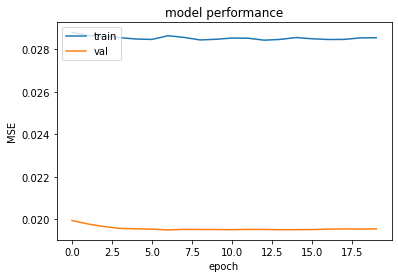

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_65 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_66 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 11        
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 0s 37ms/step - loss: 2.2296 - mse: 2.2296 - val_loss: 1.0320 - val_mse: 1.0320
Epoch 2/20
5/5 [==============================] - 0s 10ms/step - loss: 0.9321 - mse: 0.9321 - val_loss: 0.4206 - val_mse: 0.

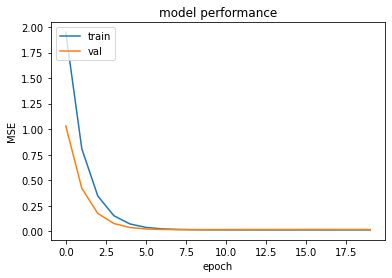

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_69 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_70 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 11        
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 0s 33ms/step - loss: 0.9927 - mse: 0.9927 - val_loss: 0.5647 - val_mse: 0.5647
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 0.4612 - mse: 0.4612 - val_loss: 0.2692 - val_mse: 0.2

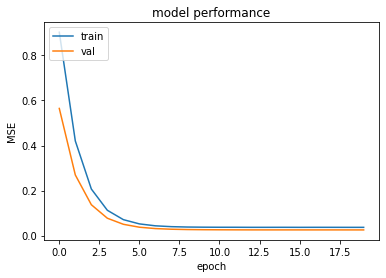

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_73 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_74 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 11        
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 0s 36ms/step - loss: 0.0737 - mse: 0.0737 - val_loss: 0.0437 - val_mse: 0.0437
Epoch 2/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0250 - val_mse: 0.

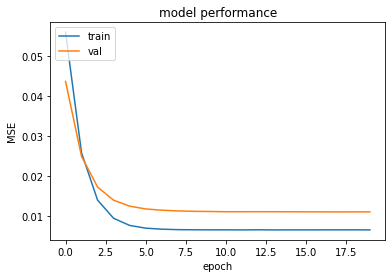

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_77 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_78 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 11        
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 0s 34ms/step - loss: 0.0692 - mse: 0.0692 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0210 - val_mse: 0.0

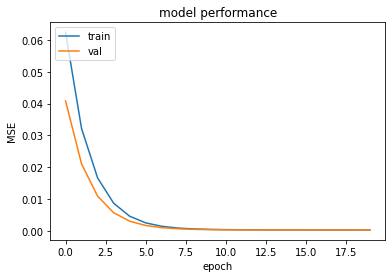

In [26]:
# Create MISO
nrow, ncol=ynorm.shape

for i in range(ncol):

  X = Xnorm
  y = ynorm[:,i]

  X_train, X_test, y_train, y_test = train_test_split(Xnorm, y, test_size=0.33)

  # define the keras model
  model = Sequential()
  model.add(Dense(10, input_shape = (9,), activation = 'sigmoid'))
  model.add(Dense(10, activation = 'sigmoid'))
  model.add(Dense(10, activation = 'sigmoid'))
  model.add(Dense(1))
  model.summary()

  sgd = optimizers.SGD(lr = 0.01)    # stochastic gradient descent optimizer

  model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse']) # for regression problems, mean squared error (MSE) is often employed
  history=model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 25, epochs = 20, verbose = 1)

  # results = model.evaluate(X_test, y_test)
  # print('loss: ', results[0])
  # print('mse: ', results[1])

  import matplotlib.pyplot as plt
  print(history.history.keys())
  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['mse'])
  plt.plot(history.history['val_mse'])
  plt.title('model performance')
  plt.ylabel('MSE')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  del model
